In [2]:
!pip install folium

In [3]:
import re
import matplotlib.pyplot as plt
import folium
import pandas as pd

In [99]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the first three lines
first_block_header = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()[:3]  # Read the first three lines

    for line in lines:
        first_block_header.append(line)

# Print the extracted first three lines
for header in first_block_header:
    print(header)

7652 Check-In 05:10 Check-Out 14:39 Category SEA-220-A,B JAN 2025

+---------------------+

Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |



In [65]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the block headers
block_headers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    inside_block = False  # Flag to indicate if we are inside a block
    block_header = []  # List to hold the current block of lines

    for line in lines:
        stripped_line = line.strip()
        
        if stripped_line.startswith("0"):  # Start of a block
            inside_block = True
            block_header = [line]  # Start a new block header
        elif inside_block:
            block_header.append(line)  # Add lines to the current block
        
        if stripped_line.endswith("F S |") and inside_block:  # End of a block
            block_headers.append(''.join(block_header))  # Save the block header
            inside_block = False  # Reset the flag

# Print the extracted block headers
for header in block_headers:
    print(header)

005:40TL 009:29 |-- -- -- -- -- -- -- |
|-- -- -- -- -- -- -- |
TAFB 009:29 005:40TL |-- -- -- -- -- -- -- |
Total Credit 005:40 |-- -- -- -- -- |
Carry Outs: +---------------------+
Date In Period Carry Out
7653 Check-In 05:10 Check-Out 21:50 Category SEA-220-A,B JAN 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

008:29TL 012:00 |-- -- -- -- -- |
+---------------------+
TAFB 040:40 011:06TL
Total Credit 011:37
Carry Outs:
Date In Period Carry Out
7654 Check-In 05:20 Check-Out 11:12 Category SEA-220-A,B JAN 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

003:47TL 005:17 +---------------------+
TAFB 053:52 013:44TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out
7655 Check-In 05:20 Check-Out 09:09 Category SEA-220-A,B JAN 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

003:14TL 004:44
TAFB 051:49 012:09TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out
7656 Chec

In [121]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the last block footer
last_block_footer = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines from the file

# Iterate through the lines in reverse order to find the last instance of a line starting with "0"
for i in range(len(lines) - 1, -1, -1):  # Start from the last line and go to the first
    if lines[i].startswith("0"):  # Check if the line starts with "0"
        # Append this line and all subsequent lines to last_block_footer
        last_block_footer.extend(lines[i:])  # Use extend to add all lines from this point onward
        break  # Exit the loop after finding the last instance

# Print the extracted last block footer
for footer in last_block_footer:
    print(footer)  # Strip whitespace for cleaner output

003:06TL 004:36

TAFB 086:05 020:20TL

Total Credit 024:36

Carry Outs:

Date In Period Carry Out

https://dalpbs.navblue.aero/webapp/ 12/9/24, 9:55 PM

Page 55 of 55



In [129]:
# Initialize lists for the two sections
flight_lines = []
layover_lines = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()

# Now, process the lines excluding block headers and footers
for line in lines:
    # Check if the line is part of block headers or footers
    if (any(line in header for header in first_block_header) or 
        any(line in header for header in block_headers) or 
        any(line in header for header in last_block_footer)):  # Check if the line equals last_block_footer
        continue  # Skip this line if it's in block headers or footers
   
    # Categorize the remaining lines
    line = line.strip()  # Strip whitespace from the line
    first_three_chars = line[:3]  # Get the first three characters

    # Check if the first three characters are all uppercase letters
    if len(first_three_chars) == 3 and all(char.isupper() for char in first_three_chars):
        layover_lines.append(line)
    else:
        flight_lines.append(line)

# Print the results
print("Lines starting with a letter:")
for line in layover_lines:
    print(line)

print("\nOther lines:")
for line in flight_lines:
    print(line)

Lines starting with a letter:
LAS 024:33 SIGNATURE AT MGM GRA 002:37TL 004:07 | -- -- -- 04 |
SNA 020:48 RENAISSANCE NEWPORT 002:52TL 004:22 | -- -- -- -- |
ANC 013:27 HOTEL CAPTAIN COOK 007:05TL 009:58 |-- -- -- -- -- -- -- |
SNA 014:06 RENAISSANCE NEWPORT 006:50TL 011:34 |-- -- -- -- -- -- -- |
DEN 013:36 DOUBLETREE DIA 002:05TL 007:49 +---------------------+
SNA 013:36 RENAISSANCE NEWPORT 006:50TL 011:34 |-- -- -- -- -- -- -- |
IAD 023:25 HYATT RESTON 005:00TL 006:30 | -- -- -- -- |
IAD 023:25 HYATT RESTON 005:00TL 006:30 | -- -- -- -- |
ATL 012:58 MARRIOTT MARQUIS 005:00TL 011:24 |-- -- -- -- -- -- -- |
SNA 017:24 RENAISSANCE NEWPORT 005:04TL 006:34 |-- -- -- -- -- -- -- |
IAD 021:02 HYATT RESTON 005:00TL 006:30 | -- -- -- -- |
SBA 014:26 MAR MONTE HYATT 007:16TL 012:07 |-- 20 -- -- -- -- -- |
ATL 014:08 MARRIOTT MARQUIS 005:00TL 010:14 |-- -- -- -- -- -- -- |
SNA 017:24 RENAISSANCE NEWPORT 005:04TL 006:34 |-- -- -- -- -- -- -- |
ORD 016:45 PALMER HOUSE 004:05TL 005:35 | -- 02 -- -

In [165]:
import re  # Import the regular expressions module

# Function to find all groups of three capitalized letters in the provided lines
def find_airport_stops(flight_lines):
    airports = []

    for line in flight_lines:
        # Find groups of three capitalized letters in the line
        groups = re.findall(r'\b[A-Z]{3}\b', line)
        airports.extend(groups)  # Add found groups to the airports list
    return airports

airport_stops = find_airport_stops(flight_lines)
print(airport_stops)

['SEA', 'LAS', 'LAS', 'SEA', 'SEA', 'LAS', 'LAS', 'SEA', 'SEA', 'LAS', 'LAS', 'SEA', 'SEA', 'SNA', 'SNA', 'SEA', 'SEA', 'ANC', 'ANC', 'SEA', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'SNA', 'SNA', 'SLC', 'SLC', 'DEN', 'DEN', 'SEA', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'SNA', 'SNA', 'SEA', 'SEA', 'IAD', 'IAD', 'SEA', 'SEA', 'IAD', 'IAD', 'SEA', 'SEA', 'IAD', 'IAD', 'ATL', 'ATL', 'BUR', 'SNA', 'SEA', 'SEA', 'IAD', 'IAD', 'ATL', 'ATL', 'SBA', 'SBA', 'SLC', 'SLC', 'SEA', 'SEA', 'IAD', 'IAD', 'ATL', 'ATL', 'BUR', 'SNA', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'ONT', 'SNA', 'SLC', 'SLC', 'SEA', 'SEA', 'ORD', 'ORD', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SFO', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SEA', 'SEA', 'ORD', 'ORD', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'DEN', 'DEN', 'SLC', 'SLC', 'SAN', 'SAN', 'SEA', 'SEA', 'DEN', 'DEN', 'SEA', 'SEA', 'DEN', 'DEN', 'SLC', 'SLC', 'ORD', 'ORD', 'SEA', 'SEA', 'SNA', 'SNA'

In [167]:
# Function to return the first three characters of each line in the provided lines
def find_first_airport_stop(layover_lines):
    airports = []
    
    for line in layover_lines:
        # Get the first three characters of the line
        first_three_chars = line[:3]  # Slicing to get the first three characters
        airports.append(first_three_chars)  # Add to the airports list
    
    return airports

airport_layovers = find_first_airport_stop(layover_lines)
print(airport_layovers)

['LAS', 'SNA', 'ANC', 'SNA', 'DEN', 'SNA', 'IAD', 'IAD', 'ATL', 'SNA', 'IAD', 'SBA', 'ATL', 'SNA', 'ORD', 'SNA', 'ORD', 'ORD', 'SFO', 'ORD', 'ORD', 'ORD', 'SFO', 'ORD', 'SFO', 'DEN', 'DEN', 'DEN', 'ORD', 'SNA', 'ANC', 'SNA', 'SNA', 'SFO', 'ANC', 'SNA', 'DFW', 'SFO', 'SNA', 'ANC', 'SNA', 'SNA', 'SNA', 'SFO', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'SNA', 'BOS', 'DEN', 'MSP', 'DEN', 'MSP', 'MSP', 'SFO', 'MSP', 'SAT', 'SNA', 'DFW', 'DEN', 'DFW', 'DEN', 'DFW', 'SFO', 'SAN', 'STL', 'SFO', 'SAN', 'ORD', 'DFW', 'GEG', 'SAN', 'ANC', 'DEN', 'MSP', 'SAT', 'SNA', 'BOS', 'DFW', 'BOS', 'JAX', 'SBA', 'BOS', 'DFW', 'BOS', 'DFW', 'GEG', 'SNA', 'SLC', 'ANC', 'DEN', 'SFO', 'ANC', 'GEG', 'DEN', 'MSP', 'SAT', 'SNA', 'LGA', 'EWR', 'IAD', 'MSP', 'SAT', 'SFO', 'MSP', 'SAT', 'SNA', 'MSP', 'SNA', 'SNA', 'SNA', 'DEN', 'DEN', 'DEN', 'DEN', 'SFO', 'BUR', 'DFW', 'DEN', 'SFO', 'DEN', 'SFO', 'IDA', 'ORD', 'DEN', 'SNA', 'SFO', 'PDX', 'DEN', 'PDX', 'SNA', 'ANC', 'ANC', 'ANC', 'ANC', 'SAT', 'SNA', 'SAT', 'SNA'

In [169]:
from collections import Counter

In [171]:
# Count instances of each string
stops_summary = Counter(airport_stops)

# Print the summary
print(stops_summary)

Counter({'SEA': 666, 'SLC': 268, 'SNA': 179, 'MSP': 160, 'DFW': 138, 'ANC': 126, 'SFO': 112, 'ORD': 90, 'LGA': 78, 'DEN': 60, 'ATL': 50, 'SAN': 48, 'MCI': 40, 'SBA': 36, 'TUS': 34, 'IAD': 33, 'SJC': 32, 'SAT': 30, 'GEG': 28, 'IAH': 27, 'JFK': 18, 'FAI': 18, 'LAS': 16, 'AUS': 16, 'MKE': 14, 'OAK': 12, 'BUR': 10, 'BOS': 10, 'BWI': 10, 'PDX': 8, 'STL': 6, 'IDA': 6, 'PSP': 6, 'BOI': 6, 'EWR': 4, 'LAX': 4, 'DCA': 3, 'JAX': 2, 'MSY': 2, 'SRQ': 2, 'SMF': 2, 'NAS': 2, 'ONT': 1, 'HOU': 1})


In [173]:
# Get the counts sorted from highest to lowest
sorted_stops = stops_summary.most_common()

In [175]:
# Prepare data for plotting
stops_labels, stops_counts = zip(*sorted_stops)  # Unzip the sorted counts into labels and counts

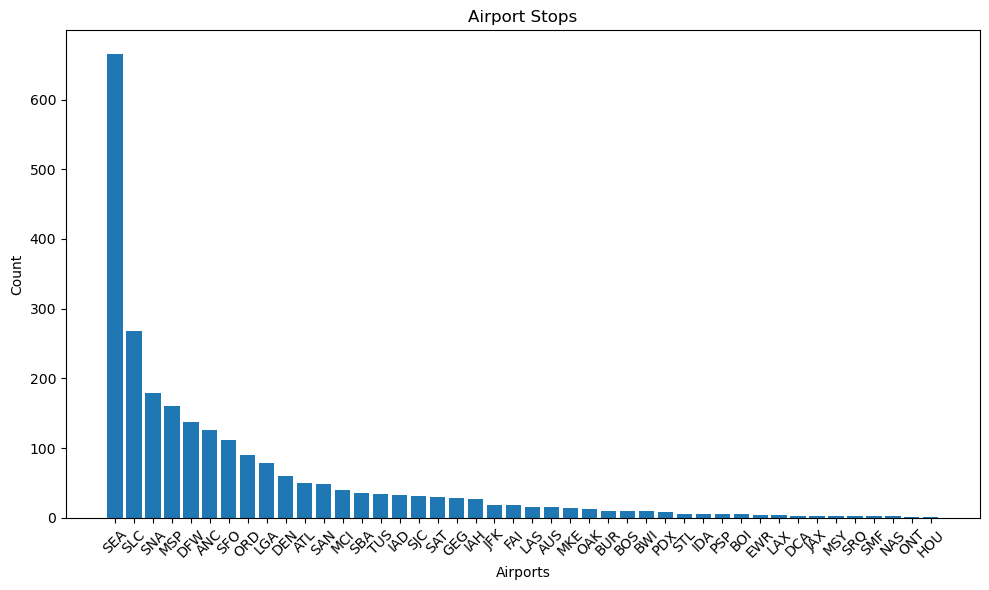

In [177]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(stops_labels, stops_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Stops')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels
# Save the plot
plt.savefig('../dist/airport_stops.png')  # Save as a PNG file
plt.show()

In [179]:
# Count instances of each string
airport_layovers_summary = Counter(airport_layovers)

# Print the summary
print(airport_layovers_summary)

Counter({'SNA': 71, 'ANC': 59, 'DFW': 53, 'ORD': 45, 'SFO': 43, 'DEN': 27, 'MCI': 19, 'SBA': 18, 'MSP': 17, 'SAT': 15, 'GEG': 14, 'LGA': 14, 'IAD': 13, 'IAH': 12, 'FAI': 9, 'BUR': 8, 'SJC': 7, 'SAN': 6, 'BOS': 5, 'SLC': 5, 'BWI': 5, 'STL': 3, 'IDA': 3, 'DCA': 3, 'ATL': 2, 'EWR': 2, 'PDX': 2, 'BOI': 2, 'LAX': 2, 'LAS': 1, 'JAX': 1, 'OAK': 1, 'HOU': 1, 'TUS': 1})


In [181]:
# Get the counts sorted from highest to lowest
airport_layovers_counts = airport_layovers_summary.most_common()
# Prepare data for plotting
layover_labels, layover_counts = zip(*airport_layovers_counts)  # Unzip the sorted counts into labels and counts

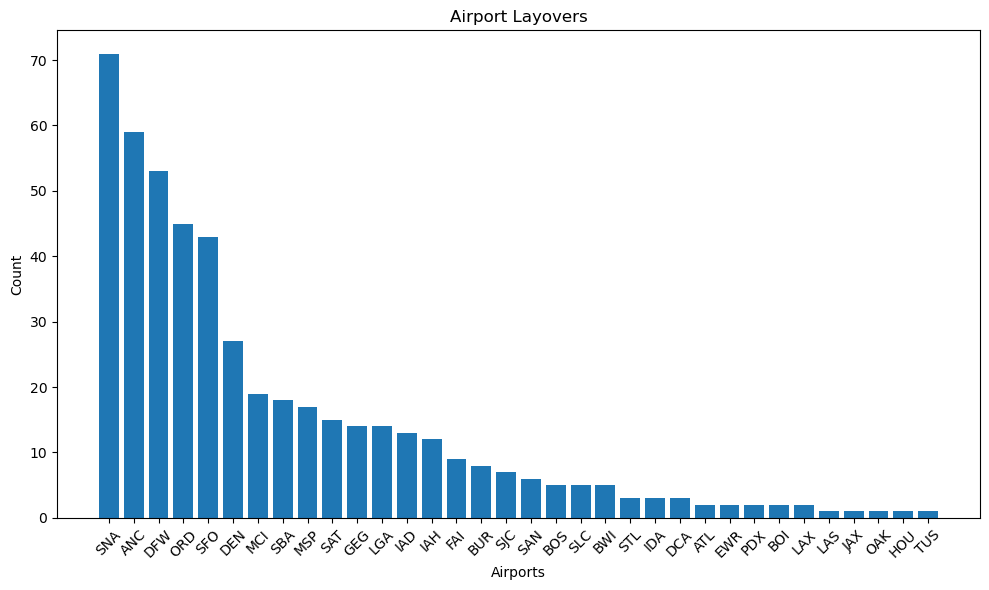

In [183]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(layover_labels, layover_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Layovers')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Save the plot
plt.savefig('../dist/airport_layover.png')  # Save as a PNG file
plt.show()

In [185]:
# Load the OpenFlights airports data
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
airports_df = pd.read_csv(url, header=None, names=columns)

# Filter for relevant columns (IATA, Latitude, Longitude)
airport_locations = airports_df[['IATA', 'Name', 'Latitude', 'Longitude']]

# Display the first few rows
print(airport_locations.head())

  IATA                                         Name  Latitude   Longitude
0  GKA                               Goroka Airport -6.081690  145.391998
1  MAG                               Madang Airport -5.207080  145.789001
2  HGU                 Mount Hagen Kagamuga Airport -5.826790  144.296005
3  LAE                               Nadzab Airport -6.569803  146.725977
4  POM  Port Moresby Jacksons International Airport -9.443380  147.220001


In [187]:
# Convert custom airports to DataFrame
stops_airports_df = pd.DataFrame(list(stops_summary.items()), columns=['IATA', 'Count'])
print(stops_airports_df.head())

  IATA  Count
0  SEA    666
1  LAS     16
2  SNA    179
3  ANC    126
4  SLC    268


In [189]:
# Merge the custom airports with the OpenFlights data to get lat/long
stops_merged_data = pd.merge(stops_airports_df, airport_locations, on='IATA', how='left')
print(stops_merged_data.head())

  IATA  Count                                         Name   Latitude  \
0  SEA    666         Seattle Tacoma International Airport  47.449001   
1  LAS     16               McCarran International Airport  36.080101   
2  SNA    179     John Wayne Airport-Orange County Airport  33.675701   
3  ANC    126  Ted Stevens Anchorage International Airport  61.174400   
4  SLC    268         Salt Lake City International Airport  40.788399   

    Longitude  
0 -122.308998  
1 -115.152000  
2 -117.867996  
3 -149.996002  
4 -111.977997  


In [191]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
airport_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Stops Map</b></h3>
             '''
airport_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in stops_merged_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 5,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(airport_map)

# Save the map to an HTML file
airport_map.save("../dist/airport_stops_map.html")

# Display the map
airport_map

In [193]:
# Convert custom airports to DataFrame
layover_airports_df = pd.DataFrame(list(airport_layovers_summary.items()), columns=['IATA', 'Count'])
print(layover_airports_df.head())

  IATA  Count
0  LAS      1
1  SNA     71
2  ANC     59
3  DEN     27
4  IAD     13


In [195]:
# Merge the custom airports with the OpenFlights data to get lat/long
layover_data = pd.merge(layover_airports_df, airport_locations, on='IATA', how='left')
print(layover_data.head())

  IATA  Count                                         Name   Latitude  \
0  LAS      1               McCarran International Airport  36.080101   
1  SNA     71     John Wayne Airport-Orange County Airport  33.675701   
2  ANC     59  Ted Stevens Anchorage International Airport  61.174400   
3  DEN     27                 Denver International Airport  39.861698   
4  IAD     13      Washington Dulles International Airport  38.944500   

    Longitude  
0 -115.152000  
1 -117.867996  
2 -149.996002  
3 -104.672997  
4  -77.455803  


In [197]:
nan_data = layover_data[layover_data.isna().any(axis=1)]
print(nan_data)

Empty DataFrame
Columns: [IATA, Count, Name, Latitude, Longitude]
Index: []


In [199]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
layover_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Layover Map</b></h3>
             '''
layover_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in layover_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 1,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(layover_map)

# Save the map to an HTML file
layover_map.save("../dist/airport_layover_map.html")

# Display the map
layover_map